<a href="https://colab.research.google.com/github/SachinKhyadi/ML-Project/blob/master/Project_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**        "Exploratory Data Analysis of Car Features"**

This is the project of car dataset,which is used to perform certain operations like altering,removing,updating,..etc of certain columns and rows.So in this notebook we will explore the data and make it ready for modeling.

**1.Importing the required libraries for EDA**

In [53]:
# Importing required EDA libraries 
import pandas as pd
import numpy as np
import seaborn as sns                             #visualisation
import matplotlib.pyplot as plt                   #visualisation
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(color_codes=True)


**1.1 Loading the data into Data frame**

In [54]:
Data=pd.read_csv("data.csv")
#To display top 5 rows
Data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [55]:
#To display bottom 5 rows
Data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.2 Checking the types of data and basic summary stats**

Here we have to check which data types are being used because sometimes the MSRP or the price of the car could be stored in string,if in that case we have to change the string to integer data type only then we can plot the data in the graph.Here as we have the given data is in integer format so no need to worry.

In [56]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**2.Dropping irrelevant columns**

This step is certainly needed in EDA because sometimes there would be some columns that we never use and in such case dropping is usefull.Here in the above given car dataset I remove the columns such as 'Market Category','Number of Doors','Engine Fuel Type'.

In [57]:
#drop the uneccessary Columns
Data=Data.drop(['Market Category','Number of Doors','Engine Fuel Type'],axis=1)

**2.1Renaming the columns**

In this step I Rename the columns of the given Car Dataset as per the problem statement assigned.
Renaming the columns as-"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"

In [58]:
#Renaming the Columns
Data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'},inplace=True)

**2.2 Count the number of rows and columns**

In this step,after Renaming and Dropping the Columns it is necessary to count the number of rows and columns to get the systematic view of Dataset. 

In [59]:
#Total number of rows and columns
Data.shape

(11914, 13)

**2.3 Checking for Duplicate data**

In this step we have to check the rows containing any duplicate data.

In [60]:
#rows containing duplicate data
duplicate_rows=Data[Data.duplicated()]
print(duplicate_rows)

         Make     Model  Year     HP  ...  MPG-H MPG-C Popularity  Price
14        BMW  1 Series  2013  230.0  ...     28    19       3916  31500
18       Audi       100  1992  172.0  ...     24    17       3105   2000
20       Audi       100  1992  172.0  ...     24    17       3105   2000
24       Audi       100  1993  172.0  ...     24    17       3105   2000
25       Audi       100  1993  172.0  ...     24    17       3105   2000
...       ...       ...   ...    ...  ...    ...   ...        ...    ...
11481  Suzuki      X-90  1998   95.0  ...     26    22        481   2000
11603   Volvo      XC60  2017  302.0  ...     29    20        870  46350
11604   Volvo      XC60  2017  240.0  ...     30    23        870  40950
11708  Suzuki       XL7  2008  252.0  ...     22    15        481  29149
11717  Suzuki       XL7  2008  252.0  ...     22    16        481  27499

[792 rows x 13 columns]


**2.4 Count the number of rows**

After checking for any duplicate data then we have to count the number of rows used.

In [61]:
#Count the number of rows used
Data.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

**2.5 Dropping the Duplicates**

In this step we have to drop the duplicate data if any exists to get rid of memory wastage.

In [62]:
#Drop the duplicates
Data=Data.drop_duplicates()
Data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**2.6 Count the number of rows after removing duplicates**

In this step we have to count the number of rows after removing duplicate data.

In [63]:
#Count the number of rows after removing duplicates.
Data.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

**3.Finding the Null Values**

In this step we have to find the null values of the given Car dataset.

In [64]:
#Finding the null values.
print(Data.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


**3.1 Drop the missing values.**

After finding the null values we have to drop the missing values if any exhists. 

In [65]:
#Drop the missing values.
Data=Data.dropna()
Data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [66]:
#After dropping the values
print(Data.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**4.Plotting the Graphs.**

In this step we have to Plot graphs of various columns to check for outliers and remove those data points from the data.An outlier is a point or set of points different from other points.It will be good practice to detect and remove outliers because sometimes they can be very high or very low.Also they will resulting in less accurate model.

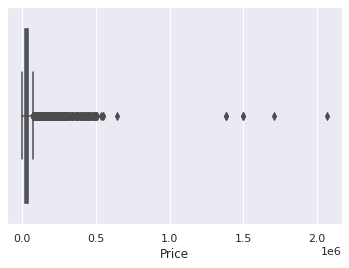

In [67]:
#Plot the graphs of Data(Columns)
sns.boxplot(x=Data['Price'])

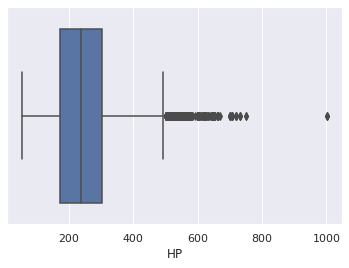

In [68]:
sns.boxplot(x=Data['HP'])

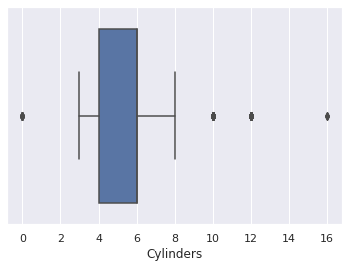

In [69]:
sns.boxplot(x=Data['Cylinders'])

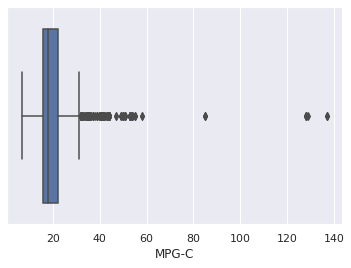

In [70]:
sns.boxplot(x=Data['MPG-C'])

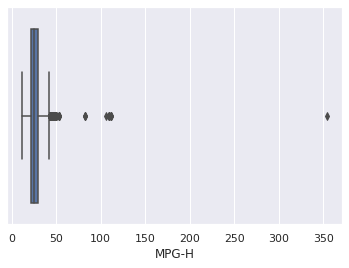

In [71]:
sns.boxplot(x=Data['MPG-H'])

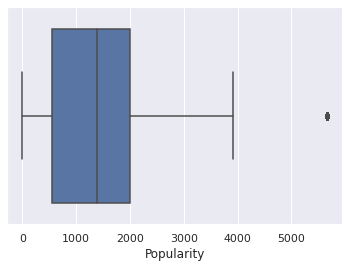

In [72]:
sns.boxplot(x=Data['Popularity'])

In [73]:
#Find IQR
Q1=Data.quantile(0.25)
Q3=Data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


**4.1 Removing the Outliners.**

After detecting the outliners, we have to remove them for getting accurate model.

In [74]:
#Remove the Outliners
Data=Data[~((Data<(Q1-1.5*IQR)) | (Data>(Q3+1.5*IQR))).any(axis=1)]

**4.2 Representation of Top Car brands and finding the average price of the cars.**

In this step,we have to check which top car brands are the most represented in the dataset and find the average price among
the top car brands.

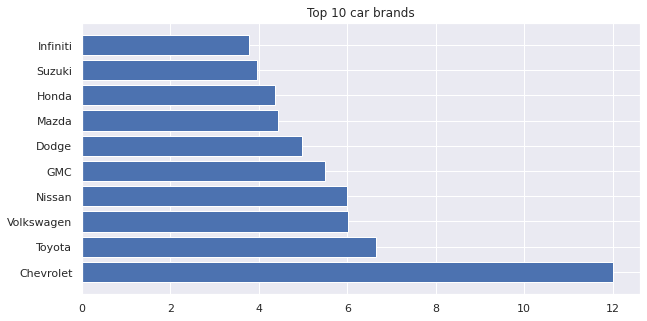

In [75]:
#Percentage of car per brand
counts=Data['Make'].value_counts()*100/sum(Data['Make'].value_counts())

#Top 10 car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

In [76]:
Prices=Data[['Make','Price']].loc[(Data['Make']=='Chevrolet')|
              (Data['Make']=='Ford')|
              (Data['Make']=='Volkswagen')|
              (Data['Make']=='Toyota')|
              (Data['Make']=='Dodge')|
              (Data['Make']=='Nissan')|
              (Data['Make']=='GMC')|
              (Data['Make']=='Honda')|
              (Data['Make']=='Mazda')].groupby('Make').mean()
print(Prices)              

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


**4.2 Plotting the Correlation Matrix.**

In this step, we have to use Heat Maps which is used to plot the necessary variables.One of the best ways to represent the correlation matrix between features.

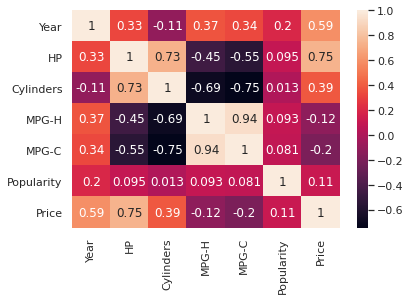

In [77]:
#Plotting Correlation Matrix
corrMatrix=Data.corr()
sns.heatmap(corrMatrix,annot=True)

**The above heatmap plotted concludes that:**

Price is positively dependent on features and Horse Power(HP) and Year.

The features HP and Cylinders are positively dependent on each other,

Therefore,if the number of Cylinders are increased then,MPG-H and MPG-C decreases.



**4.3 Performing EDA and plotting graphs.**

In this step,we have to perform exploratory data analysis and for representaion of data I have used bar graphs to see how other
variables affect the price of the car.

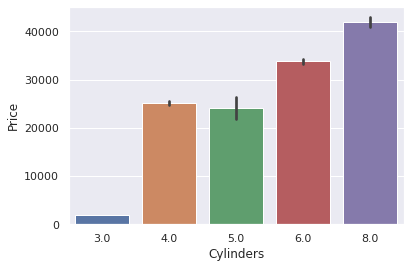

In [78]:
sns.barplot(Data['Cylinders'],Data['Price'])

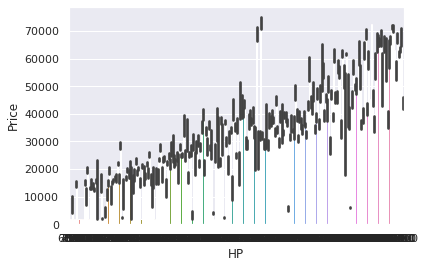

In [79]:
sns.barplot(Data['HP'],Data['Price'])

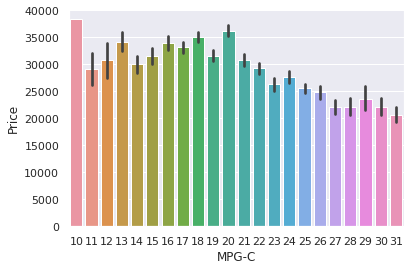

In [80]:
sns.barplot(Data['MPG-C'],Data['Price'])

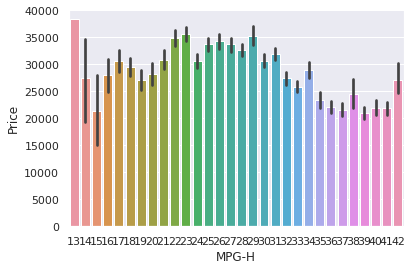

In [81]:
sns.barplot(Data['MPG-H'],Data['Price'])

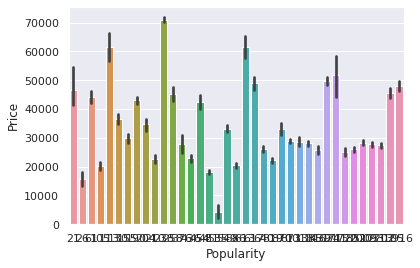

In [82]:
sns.barplot(Data['Popularity'],Data['Price'])

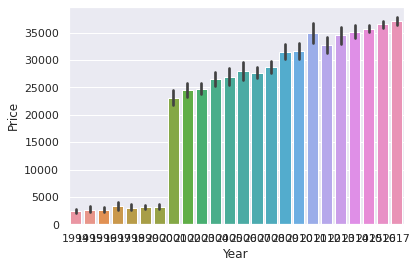

In [83]:
sns.barplot(Data['Year'],Data['Price'])

In [84]:
dcc=Data.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

**5.Splitting of dataset.**

In this step,we have to split the dataset into 80 and 20 ratio and build a machine learning model with 'Price' as the target variable.

In [85]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc=LabelEncoder()
for i in dcc:
  Data[i]=label_enc.fit_transform(Data[i])
print('Label Encoded Data')
Data.head()

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


In [86]:
#Setting the Target Value
y=Data['Price']

In [87]:
#create training and testing vars
X_train,X_test,y_train,y_test=train_test_split(Data,y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6836, 13) (6836,)
(1710, 13) (1710,)


In [88]:
#Fit in a model
from sklearn.linear_model import LinearRegression
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

[Text(0, 0.5, 'Predictions'), Text(0.5, 0, 'True Values')]

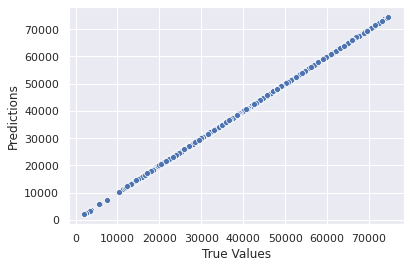

In [89]:
#Plotting the predictions
ax=sns.scatterplot(y_test,predictions)
ax.set(xlabel="True Values",ylabel="Predictions")

In [90]:
print('Score:'),model.score(X_test,y_test)

Score:


(None, 1.0)